In [8]:
from platform import python_version
print('Versão da Linguagem de Python usada nesse Jupyter Notebook:', python_version())

Versão da Linguagem de Python usada nesse Jupyter Notebook: 3.9.7


In [9]:
!pip install -q tensorflow==2.5

In [39]:
!pip install -q pydot

In [59]:
!pip install graphviz

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49152/49082 [==============================] - 0s 8us/step


In [17]:
nomes_colunas= ['CRIM',
               'ZN',
               'INDUS',
               'CHAS',
               'NOX',
               'RM',
               'AGE',
               'DIS',
               'RAD',
               'TAX',
               'PTRATIO',
               'B',
               'LSTAT',
               'MEDV']

In [18]:
dataset = pd.read_csv(dataset_path,
                     names = nomes_colunas,
                     na_values = "?",
                     comment = '\t',
                     sep = " ",
                     skipinitialspace = True)

In [20]:
dataset.shape

(506, 14)

In [21]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

# Modelo de Regressão Linear Simples

 - variável independente: 'RM'
 - variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

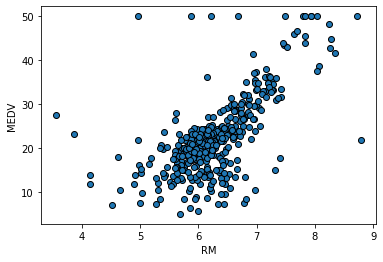

In [23]:
#Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [24]:
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

# Criação do Modelo

Vamos encontrar os parâmetros (W) que permite prever a saída y a partir da entrada x:
    
y = w1x + w0
    
A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artifical:
    
layers.Dense(1, use_blas=True, input_shape=(1,))

In [64]:
def modelo_linear():
    
    
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

   
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
   
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

In [63]:
modelo = modelo_linear()

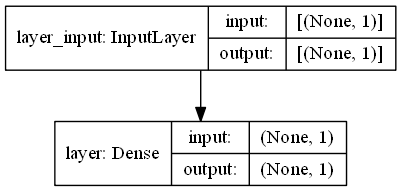

In [62]:
tf.keras.utils.plot_model(modelo,
                         to_file = 'imagens/modelo.png',
                         show_shapes = True,
                         show_layer_names = True,
                         rankdir = 'TB',
                         expand_nested = False,
                         dpi = 100)

In [66]:
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [67]:
#callback - técnica para que o modelo não aprenda demais
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                patience = n_idle_epochs,
                                                min_delta = 0.001)

In [68]:
#lista para as previsões
predictions_list = []

In [70]:
#caminho para salvar o checkpoint
checkpoint_path = "dados/"

In [71]:
#criar uma callback que salve o modelo de tempo em tempo 
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/",
                                                       verbose = 1,
                                                       save_weights_only = True,
                                                       save_freq = n_samples_save)

In [72]:
#salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [73]:
#treinamento
history = modelo.fit(x_treino,
                    y_treino,
                    batch_size = batch_size,
                    epochs = n_epochs,
                    validation_split = 0.1,
                    verbose = 1,
                    callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 2s 245ms/step - loss: 519.6051 - mae: 21.0896 - mse: 519.6051 - val_loss: 605.3487 - val_mae: 22.3510 - val_mse: 605.3487
Epoch 2/4000
2/2 [==============================] - 0s 32ms/step - loss: 513.2585 - mae: 20.9445 - mse: 513.2585 - val_loss: 598.7256 - val_mae: 22.2052 - val_mse: 598.7256
Epoch 3/4000
2/2 [==============================] - 0s 21ms/step - loss: 507.1189 - mae: 20.7991 - mse: 507.1189 - val_loss: 592.1464 - val_mae: 22.0593 - val_mse: 592.1464
Epoch 4/4000
2/2 [==============================] - 0s 20ms/step - loss: 500.8527 - mae: 20.6540 - mse: 500.8527 - val_loss: 585.6182 - val_mae: 21.9137 - val_mse: 585.6182
Epoch 5/4000
2/2 [==============================] - 0s 20ms/step - loss: 494.7543 - mae: 20.5090 - mse: 494.7543 - val_loss: 579.1312 - val_mae: 21.7680 - val_mse: 579.1312
Epoch 6/4000
2/2 [==============================] - 0s 23ms/step - loss: 488.6732 - mae: 20.3638 - mse: 488.6732 - val_loss: 572.6942 

2/2 [==============================] - 0s 17ms/step - loss: 281.4996 - mae: 14.6473 - mse: 281.4996 - val_loss: 352.1506 - val_mae: 15.8972 - val_mse: 352.1506
Epoch 49/4000
2/2 [==============================] - 0s 17ms/step - loss: 277.6492 - mae: 14.5232 - mse: 277.6492 - val_loss: 348.0050 - val_mae: 15.7754 - val_mse: 348.0050
Epoch 50/4000
2/2 [==============================] - 0s 18ms/step - loss: 273.8568 - mae: 14.3998 - mse: 273.8568 - val_loss: 343.9172 - val_mae: 15.6543 - val_mse: 343.9172
Epoch 51/4000
2/2 [==============================] - 0s 21ms/step - loss: 270.0981 - mae: 14.2777 - mse: 270.0981 - val_loss: 339.8873 - val_mae: 15.5339 - val_mse: 339.8873
Epoch 52/4000
2/2 [==============================] - 0s 30ms/step - loss: 266.3867 - mae: 14.1551 - mse: 266.3867 - val_loss: 335.9084 - val_mae: 15.4141 - val_mse: 335.9084
Epoch 53/4000
2/2 [==============================] - 0s 17ms/step - loss: 262.7043 - mae: 14.0341 - mse: 262.7043 - val_loss: 331.9719 - val_mae

Epoch 95/4000
2/2 [==============================] - 0s 20ms/step - loss: 145.8850 - mae: 9.6541 - mse: 145.8850 - val_loss: 204.0155 - val_mae: 11.1030 - val_mse: 204.0155
Epoch 96/4000
2/2 [==============================] - 0s 20ms/step - loss: 143.9024 - mae: 9.5694 - mse: 143.9024 - val_loss: 201.7971 - val_mae: 11.0241 - val_mse: 201.7971
Epoch 97/4000
2/2 [==============================] - 0s 18ms/step - loss: 141.9030 - mae: 9.4839 - mse: 141.9030 - val_loss: 199.6136 - val_mae: 10.9457 - val_mse: 199.6136
Epoch 98/4000
2/2 [==============================] - 0s 19ms/step - loss: 140.0069 - mae: 9.4000 - mse: 140.0069 - val_loss: 197.4500 - val_mae: 10.8672 - val_mse: 197.4500
Epoch 99/4000
2/2 [==============================] - 0s 17ms/step - loss: 138.1531 - mae: 9.3183 - mse: 138.1531 - val_loss: 195.3193 - val_mae: 10.7891 - val_mse: 195.3193
Epoch 100/4000
2/2 [==============================] - 0s 18ms/step - loss: 136.2454 - mae: 9.2356 - mse: 136.2454 - val_loss: 193.2316 

2/2 [==============================] - 0s 16ms/step - loss: 81.3589 - mae: 6.6850 - mse: 81.3589 - val_loss: 129.6063 - val_mae: 8.2047 - val_mse: 129.6063
Epoch 143/4000
2/2 [==============================] - 0s 20ms/step - loss: 80.5995 - mae: 6.6441 - mse: 80.5995 - val_loss: 128.6141 - val_mae: 8.1657 - val_mse: 128.6141
Epoch 144/4000
2/2 [==============================] - 0s 18ms/step - loss: 79.7714 - mae: 6.6005 - mse: 79.7714 - val_loss: 127.6476 - val_mae: 8.1273 - val_mse: 127.6476
Epoch 145/4000
2/2 [==============================] - 0s 19ms/step - loss: 79.0434 - mae: 6.5592 - mse: 79.0434 - val_loss: 126.6964 - val_mae: 8.0890 - val_mse: 126.6964
Epoch 146/4000
2/2 [==============================] - 0s 18ms/step - loss: 78.2753 - mae: 6.5173 - mse: 78.2753 - val_loss: 125.7754 - val_mae: 8.0514 - val_mse: 125.7754
Epoch 147/4000
2/2 [==============================] - 0s 18ms/step - loss: 77.5378 - mae: 6.4771 - mse: 77.5378 - val_loss: 124.8766 - val_mae: 8.0143 - val_mse

Epoch 190/4000
2/2 [==============================] - 0s 25ms/step - loss: 59.2828 - mae: 5.4075 - mse: 59.2828 - val_loss: 100.5216 - val_mae: 7.0043 - val_mse: 100.5216
Epoch 191/4000
2/2 [==============================] - 0s 31ms/step - loss: 59.0950 - mae: 5.3969 - mse: 59.0950 - val_loss: 100.2263 - val_mae: 6.9948 - val_mse: 100.2263
Epoch 192/4000
2/2 [==============================] - 0s 17ms/step - loss: 58.8997 - mae: 5.3861 - mse: 58.8997 - val_loss: 99.9385 - val_mae: 6.9855 - val_mse: 99.9385
Epoch 193/4000
2/2 [==============================] - 0s 18ms/step - loss: 58.7336 - mae: 5.3763 - mse: 58.7336 - val_loss: 99.6529 - val_mae: 6.9760 - val_mse: 99.6529
Epoch 194/4000
2/2 [==============================] - 0s 18ms/step - loss: 58.5578 - mae: 5.3673 - mse: 58.5578 - val_loss: 99.3747 - val_mae: 6.9667 - val_mse: 99.3747
Epoch 195/4000
2/2 [==============================] - 0s 17ms/step - loss: 58.3807 - mae: 5.3579 - mse: 58.3807 - val_loss: 99.1014 - val_mae: 6.9579 -

2/2 [==============================] - 0s 19ms/step - loss: 55.3661 - mae: 5.2724 - mse: 55.3661 - val_loss: 92.9896 - val_mae: 6.8044 - val_mse: 92.9896
Epoch 239/4000
2/2 [==============================] - 0s 17ms/step - loss: 55.3467 - mae: 5.2737 - mse: 55.3467 - val_loss: 92.9300 - val_mae: 6.8040 - val_mse: 92.9300
Epoch 240/4000
2/2 [==============================] - 0s 17ms/step - loss: 55.3352 - mae: 5.2752 - mse: 55.3352 - val_loss: 92.8743 - val_mae: 6.8037 - val_mse: 92.8743
Epoch 241/4000
2/2 [==============================] - 0s 19ms/step - loss: 55.3178 - mae: 5.2763 - mse: 55.3178 - val_loss: 92.8251 - val_mae: 6.8034 - val_mse: 92.8251
Epoch 242/4000
2/2 [==============================] - 0s 18ms/step - loss: 55.3086 - mae: 5.2773 - mse: 55.3086 - val_loss: 92.7796 - val_mae: 6.8031 - val_mse: 92.7796
Epoch 243/4000
2/2 [==============================] - 0s 18ms/step - loss: 55.2917 - mae: 5.2781 - mse: 55.2917 - val_loss: 92.7392 - val_mae: 6.8028 - val_mse: 92.7392
E

2/2 [==============================] - 0s 17ms/step - loss: 55.0987 - mae: 5.3087 - mse: 55.0987 - val_loss: 91.8587 - val_mae: 6.7935 - val_mse: 91.8587
Epoch 287/4000
2/2 [==============================] - 0s 18ms/step - loss: 55.0959 - mae: 5.3091 - mse: 55.0959 - val_loss: 91.8432 - val_mae: 6.7933 - val_mse: 91.8432
Epoch 288/4000
2/2 [==============================] - 0s 19ms/step - loss: 55.0925 - mae: 5.3097 - mse: 55.0925 - val_loss: 91.8304 - val_mae: 6.7931 - val_mse: 91.8304
Epoch 289/4000
2/2 [==============================] - 0s 18ms/step - loss: 55.0898 - mae: 5.3103 - mse: 55.0898 - val_loss: 91.8172 - val_mae: 6.7929 - val_mse: 91.8172
Epoch 290/4000
2/2 [==============================] - 0s 18ms/step - loss: 55.0877 - mae: 5.3109 - mse: 55.0877 - val_loss: 91.8036 - val_mae: 6.7927 - val_mse: 91.8036
Epoch 291/4000
2/2 [==============================] - 0s 17ms/step - loss: 55.0855 - mae: 5.3115 - mse: 55.0855 - val_loss: 91.7924 - val_mae: 6.7925 - val_mse: 91.7924
E

2/2 [==============================] - 0s 20ms/step - loss: 54.9620 - mae: 5.3085 - mse: 54.9620 - val_loss: 91.6654 - val_mae: 6.7850 - val_mse: 91.6654
Epoch 334/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.9521 - mae: 5.3067 - mse: 54.9521 - val_loss: 91.6711 - val_mae: 6.7849 - val_mse: 91.6711
Epoch 335/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.9492 - mae: 5.3059 - mse: 54.9492 - val_loss: 91.6774 - val_mae: 6.7847 - val_mse: 91.6774
Epoch 336/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.9459 - mae: 5.3053 - mse: 54.9459 - val_loss: 91.6804 - val_mae: 6.7845 - val_mse: 91.6804
Epoch 337/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.9426 - mae: 5.3044 - mse: 54.9426 - val_loss: 91.6929 - val_mae: 6.7844 - val_mse: 91.6929
Epoch 338/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.9372 - mae: 5.3033 - mse: 54.9372 - val_loss: 91.6965 - val_mae: 6.7842 - val_mse: 91.6965
E

2/2 [==============================] - 0s 19ms/step - loss: 54.7453 - mae: 5.2887 - mse: 54.7453 - val_loss: 91.5793 - val_mae: 6.7734 - val_mse: 91.5793
Epoch 382/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.7433 - mae: 5.2909 - mse: 54.7433 - val_loss: 91.5499 - val_mae: 6.7730 - val_mse: 91.5499
Epoch 383/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.7326 - mae: 5.2917 - mse: 54.7326 - val_loss: 91.5393 - val_mae: 6.7726 - val_mse: 91.5393
Epoch 384/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.7297 - mae: 5.2920 - mse: 54.7297 - val_loss: 91.5349 - val_mae: 6.7723 - val_mse: 91.5349
Epoch 385/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.7223 - mae: 5.2912 - mse: 54.7223 - val_loss: 91.5455 - val_mae: 6.7721 - val_mse: 91.5455
Epoch 386/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.7244 - mae: 5.2902 - mse: 54.7244 - val_loss: 91.5455 - val_mae: 6.7719 - val_mse: 91.5455
E

2/2 [==============================] - 0s 16ms/step - loss: 54.4440 - mae: 5.2825 - mse: 54.4440 - val_loss: 91.2576 - val_mae: 6.7557 - val_mse: 91.2576
Epoch 430/4000
2/2 [==============================] - 0s 21ms/step - loss: 54.4388 - mae: 5.2793 - mse: 54.4388 - val_loss: 91.3086 - val_mae: 6.7556 - val_mse: 91.3086
Epoch 431/4000
2/2 [==============================] - 0s 20ms/step - loss: 54.4275 - mae: 5.2754 - mse: 54.4275 - val_loss: 91.3459 - val_mae: 6.7555 - val_mse: 91.3459
Epoch 432/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.4240 - mae: 5.2726 - mse: 54.4240 - val_loss: 91.3770 - val_mae: 6.7554 - val_mse: 91.3770
Epoch 433/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.4172 - mae: 5.2698 - mse: 54.4172 - val_loss: 91.3882 - val_mae: 6.7550 - val_mse: 91.3882
Epoch 434/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.4082 - mae: 5.2688 - mse: 54.4082 - val_loss: 91.3833 - val_mae: 6.7546 - val_mse: 91.3833
E

2/2 [==============================] - 0s 18ms/step - loss: 54.0792 - mae: 5.2474 - mse: 54.0792 - val_loss: 91.1615 - val_mae: 6.7358 - val_mse: 91.1615
Epoch 478/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.0728 - mae: 5.2492 - mse: 54.0728 - val_loss: 91.1051 - val_mae: 6.7349 - val_mse: 91.1051
Epoch 479/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.0595 - mae: 5.2510 - mse: 54.0595 - val_loss: 91.0630 - val_mae: 6.7342 - val_mse: 91.0630
Epoch 480/4000
2/2 [==============================] - 0s 19ms/step - loss: 54.0623 - mae: 5.2536 - mse: 54.0623 - val_loss: 91.0170 - val_mae: 6.7335 - val_mse: 91.0170
Epoch 481/4000
2/2 [==============================] - 0s 18ms/step - loss: 54.0451 - mae: 5.2549 - mse: 54.0451 - val_loss: 91.0108 - val_mae: 6.7330 - val_mse: 91.0108
Epoch 482/4000
2/2 [==============================] - 0s 17ms/step - loss: 54.0368 - mae: 5.2541 - mse: 54.0368 - val_loss: 91.0177 - val_mae: 6.7326 - val_mse: 91.0177
E

2/2 [==============================] - 0s 20ms/step - loss: 53.6842 - mae: 5.2178 - mse: 53.6842 - val_loss: 90.9781 - val_mae: 6.7132 - val_mse: 90.9781
Epoch 526/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.6747 - mae: 5.2208 - mse: 53.6747 - val_loss: 90.8960 - val_mae: 6.7122 - val_mse: 90.8960
Epoch 527/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.6705 - mae: 5.2253 - mse: 53.6705 - val_loss: 90.8306 - val_mae: 6.7113 - val_mse: 90.8306
Epoch 528/4000
2/2 [==============================] - 0s 17ms/step - loss: 53.6529 - mae: 5.2269 - mse: 53.6529 - val_loss: 90.7955 - val_mae: 6.7106 - val_mse: 90.7955
Epoch 529/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.6441 - mae: 5.2279 - mse: 53.6441 - val_loss: 90.7674 - val_mae: 6.7100 - val_mse: 90.7674
Epoch 530/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.6357 - mae: 5.2290 - mse: 53.6357 - val_loss: 90.7422 - val_mae: 6.7094 - val_mse: 90.7422
E

2/2 [==============================] - 0s 16ms/step - loss: 53.2623 - mae: 5.2127 - mse: 53.2623 - val_loss: 90.3702 - val_mae: 6.6866 - val_mse: 90.3702
Epoch 574/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.2551 - mae: 5.2156 - mse: 53.2551 - val_loss: 90.3124 - val_mae: 6.6857 - val_mse: 90.3124
Epoch 575/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.2595 - mae: 5.2194 - mse: 53.2595 - val_loss: 90.2639 - val_mae: 6.6849 - val_mse: 90.2639
Epoch 576/4000
2/2 [==============================] - 0s 19ms/step - loss: 53.2466 - mae: 5.2210 - mse: 53.2466 - val_loss: 90.2509 - val_mae: 6.6843 - val_mse: 90.2509
Epoch 577/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.2411 - mae: 5.2213 - mse: 53.2411 - val_loss: 90.2452 - val_mae: 6.6837 - val_mse: 90.2452
Epoch 578/4000
2/2 [==============================] - 0s 18ms/step - loss: 53.2281 - mae: 5.2202 - mse: 53.2281 - val_loss: 90.2737 - val_mae: 6.6835 - val_mse: 90.2737
E

2/2 [==============================] - 0s 16ms/step - loss: 52.8547 - mae: 5.1728 - mse: 52.8547 - val_loss: 90.3539 - val_mae: 6.6637 - val_mse: 90.3539
Epoch 622/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.8440 - mae: 5.1739 - mse: 52.8440 - val_loss: 90.3081 - val_mae: 6.6629 - val_mse: 90.3081
Epoch 623/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.8323 - mae: 5.1754 - mse: 52.8323 - val_loss: 90.2634 - val_mae: 6.6621 - val_mse: 90.2634
Epoch 624/4000
2/2 [==============================] - 0s 15ms/step - loss: 52.8312 - mae: 5.1783 - mse: 52.8312 - val_loss: 90.2096 - val_mae: 6.6613 - val_mse: 90.2096
Epoch 625/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.8152 - mae: 5.1798 - mse: 52.8152 - val_loss: 90.1846 - val_mae: 6.6606 - val_mse: 90.1846
Epoch 626/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.8103 - mae: 5.1803 - mse: 52.8103 - val_loss: 90.1473 - val_mae: 6.6599 - val_mse: 90.1473
E

2/2 [==============================] - 0s 16ms/step - loss: 52.4471 - mae: 5.1534 - mse: 52.4471 - val_loss: 89.9952 - val_mae: 6.6385 - val_mse: 89.9952
Epoch 670/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.4425 - mae: 5.1548 - mse: 52.4425 - val_loss: 89.9538 - val_mae: 6.6377 - val_mse: 89.9538
Epoch 671/4000
2/2 [==============================] - 0s 15ms/step - loss: 52.4302 - mae: 5.1558 - mse: 52.4302 - val_loss: 89.9342 - val_mae: 6.6371 - val_mse: 89.9342
Epoch 672/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.4184 - mae: 5.1563 - mse: 52.4184 - val_loss: 89.8900 - val_mae: 6.6363 - val_mse: 89.8900
Epoch 673/4000
2/2 [==============================] - 0s 19ms/step - loss: 52.4143 - mae: 5.1589 - mse: 52.4143 - val_loss: 89.8436 - val_mae: 6.6355 - val_mse: 89.8436
Epoch 674/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.4060 - mae: 5.1609 - mse: 52.4060 - val_loss: 89.8250 - val_mae: 6.6348 - val_mse: 89.8250
E

2/2 [==============================] - 0s 16ms/step - loss: 52.0342 - mae: 5.1450 - mse: 52.0342 - val_loss: 89.4665 - val_mae: 6.6108 - val_mse: 89.4665
Epoch 718/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.0258 - mae: 5.1450 - mse: 52.0258 - val_loss: 89.4633 - val_mae: 6.6102 - val_mse: 89.4633
Epoch 719/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.0149 - mae: 5.1439 - mse: 52.0149 - val_loss: 89.4804 - val_mae: 6.6098 - val_mse: 89.4804
Epoch 720/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.0052 - mae: 5.1418 - mse: 52.0052 - val_loss: 89.5183 - val_mae: 6.6096 - val_mse: 89.5183
Epoch 721/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.9876 - mae: 5.1371 - mse: 51.9876 - val_loss: 89.5969 - val_mae: 6.6096 - val_mse: 89.5969
Epoch 722/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.9778 - mae: 5.1307 - mse: 51.9778 - val_loss: 89.6942 - val_mae: 6.6098 - val_mse: 89.6942
E

2/2 [==============================] - 0s 17ms/step - loss: 51.6108 - mae: 5.0987 - mse: 51.6108 - val_loss: 89.6029 - val_mae: 6.5874 - val_mse: 89.6029
Epoch 766/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.6151 - mae: 5.0942 - mse: 51.6151 - val_loss: 89.6751 - val_mae: 6.5873 - val_mse: 89.6751
Epoch 767/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.6129 - mae: 5.0905 - mse: 51.6129 - val_loss: 89.7000 - val_mae: 6.5870 - val_mse: 89.7000
Epoch 768/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.6042 - mae: 5.0893 - mse: 51.6042 - val_loss: 89.6830 - val_mae: 6.5864 - val_mse: 89.6830
Epoch 769/4000
2/2 [==============================] - 0s 26ms/step - loss: 51.5934 - mae: 5.0893 - mse: 51.5934 - val_loss: 89.6641 - val_mae: 6.5857 - val_mse: 89.6641
Epoch 770/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.5848 - mae: 5.0892 - mse: 51.5848 - val_loss: 89.6404 - val_mae: 6.5851 - val_mse: 89.6404
E

2/2 [==============================] - 0s 18ms/step - loss: 51.2051 - mae: 5.0786 - mse: 51.2051 - val_loss: 89.1812 - val_mae: 6.5600 - val_mse: 89.1812
Epoch 814/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.1971 - mae: 5.0768 - mse: 51.1971 - val_loss: 89.1701 - val_mae: 6.5594 - val_mse: 89.1701
Epoch 815/4000
2/2 [==============================] - 0s 19ms/step - loss: 51.1845 - mae: 5.0768 - mse: 51.1845 - val_loss: 89.1228 - val_mae: 6.5586 - val_mse: 89.1228
Epoch 816/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.1815 - mae: 5.0795 - mse: 51.1815 - val_loss: 89.0827 - val_mae: 6.5578 - val_mse: 89.0827
Epoch 817/4000
2/2 [==============================] - 0s 18ms/step - loss: 51.1684 - mae: 5.0795 - mse: 51.1684 - val_loss: 89.0689 - val_mae: 6.5572 - val_mse: 89.0689
Epoch 818/4000
2/2 [==============================] - 0s 19ms/step - loss: 51.1581 - mae: 5.0796 - mse: 51.1581 - val_loss: 89.0344 - val_mae: 6.5564 - val_mse: 89.0344
E

2/2 [==============================] - 0s 16ms/step - loss: 50.8150 - mae: 5.0528 - mse: 50.8150 - val_loss: 88.9170 - val_mae: 6.5343 - val_mse: 88.9170
Epoch 862/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.8029 - mae: 5.0524 - mse: 50.8029 - val_loss: 88.9299 - val_mae: 6.5339 - val_mse: 88.9299
Epoch 863/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.7946 - mae: 5.0509 - mse: 50.7946 - val_loss: 88.9565 - val_mae: 6.5336 - val_mse: 88.9565
Epoch 864/4000
2/2 [==============================] - 0s 20ms/step - loss: 50.7875 - mae: 5.0485 - mse: 50.7875 - val_loss: 88.9928 - val_mae: 6.5333 - val_mse: 88.9928
Epoch 865/4000
2/2 [==============================] - 0s 17ms/step - loss: 50.7906 - mae: 5.0462 - mse: 50.7906 - val_loss: 89.0261 - val_mae: 6.5331 - val_mse: 89.0261
Epoch 866/4000
2/2 [==============================] - 0s 17ms/step - loss: 50.7801 - mae: 5.0440 - mse: 50.7801 - val_loss: 89.0087 - val_mae: 6.5325 - val_mse: 89.0087
E

Epoch 909/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.4344 - mae: 5.0351 - mse: 50.4344 - val_loss: 88.5291 - val_mae: 6.5082 - val_mse: 88.5291
Epoch 910/4000
2/2 [==============================] - 0s 15ms/step - loss: 50.4386 - mae: 5.0367 - mse: 50.4386 - val_loss: 88.4996 - val_mae: 6.5075 - val_mse: 88.4996
Epoch 911/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.4202 - mae: 5.0368 - mse: 50.4202 - val_loss: 88.5172 - val_mae: 6.5072 - val_mse: 88.5172
Epoch 912/4000
2/2 [==============================] - 0s 15ms/step - loss: 50.4143 - mae: 5.0354 - mse: 50.4143 - val_loss: 88.5475 - val_mae: 6.5069 - val_mse: 88.5475
Epoch 913/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.4066 - mae: 5.0322 - mse: 50.4066 - val_loss: 88.6118 - val_mae: 6.5068 - val_mse: 88.6118
Epoch 914/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.3948 - mae: 5.0282 - mse: 50.3948 - val_loss: 88.6587 - val_mae: 6.5067 - val

2/2 [==============================] - 0s 17ms/step - loss: 50.0755 - mae: 5.0043 - mse: 50.0755 - val_loss: 88.4346 - val_mae: 6.4845 - val_mse: 88.4346
Epoch 958/4000
2/2 [==============================] - 0s 17ms/step - loss: 50.0664 - mae: 5.0060 - mse: 50.0664 - val_loss: 88.3951 - val_mae: 6.4837 - val_mse: 88.3951
Epoch 959/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.0601 - mae: 5.0073 - mse: 50.0601 - val_loss: 88.3608 - val_mae: 6.4830 - val_mse: 88.3608
Epoch 960/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.0500 - mae: 5.0082 - mse: 50.0500 - val_loss: 88.3412 - val_mae: 6.4824 - val_mse: 88.3412
Epoch 961/4000
2/2 [==============================] - 0s 15ms/step - loss: 50.0429 - mae: 5.0085 - mse: 50.0429 - val_loss: 88.3192 - val_mae: 6.4817 - val_mse: 88.3192
Epoch 962/4000
2/2 [==============================] - 0s 17ms/step - loss: 50.0387 - mae: 5.0094 - mse: 50.0387 - val_loss: 88.3066 - val_mae: 6.4811 - val_mse: 88.3066
E

2/2 [==============================] - 0s 23ms/step - loss: 49.7206 - mae: 4.9861 - mse: 49.7206 - val_loss: 88.1189 - val_mae: 6.4593 - val_mse: 88.1189
Epoch 1006/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.7194 - mae: 4.9885 - mse: 49.7194 - val_loss: 88.0461 - val_mae: 6.4583 - val_mse: 88.0461
Epoch 1007/4000
2/2 [==============================] - 0s 20ms/step - loss: 49.7133 - mae: 4.9921 - mse: 49.7133 - val_loss: 88.0137 - val_mae: 6.4580 - val_mse: 88.0137
Epoch 1008/4000
2/2 [==============================] - 0s 19ms/step - loss: 49.7027 - mae: 4.9921 - mse: 49.7027 - val_loss: 88.0114 - val_mae: 6.4576 - val_mse: 88.0114
Epoch 1009/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.6944 - mae: 4.9917 - mse: 49.6944 - val_loss: 87.9905 - val_mae: 6.4574 - val_mse: 87.9905
Epoch 1010/4000
2/2 [==============================] - 0s 20ms/step - loss: 49.6870 - mae: 4.9923 - mse: 49.6870 - val_loss: 87.9572 - val_mae: 6.4574 - val_mse: 87.9

2/2 [==============================] - 0s 18ms/step - loss: 49.4253 - mae: 4.9471 - mse: 49.4253 - val_loss: 88.4426 - val_mae: 6.4533 - val_mse: 88.4426
Epoch 1054/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.4247 - mae: 4.9451 - mse: 49.4247 - val_loss: 88.4795 - val_mae: 6.4545 - val_mse: 88.4795
Epoch 1055/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.4264 - mae: 4.9436 - mse: 49.4264 - val_loss: 88.4940 - val_mae: 6.4549 - val_mse: 88.4940
Epoch 1056/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.4228 - mae: 4.9427 - mse: 49.4228 - val_loss: 88.4791 - val_mae: 6.4541 - val_mse: 88.4791
Epoch 1057/4000
2/2 [==============================] - 0s 19ms/step - loss: 49.4131 - mae: 4.9427 - mse: 49.4131 - val_loss: 88.4283 - val_mae: 6.4521 - val_mse: 88.4283
Epoch 1058/4000
2/2 [==============================] - 0s 17ms/step - loss: 49.4028 - mae: 4.9442 - mse: 49.4028 - val_loss: 88.3442 - val_mae: 6.4487 - val_mse: 88.3

Epoch 1101/4000
2/2 [==============================] - 0s 20ms/step - loss: 49.0722 - mae: 4.9412 - mse: 49.0722 - val_loss: 87.7995 - val_mae: 6.4189 - val_mse: 87.7995
Epoch 1102/4000
2/2 [==============================] - 0s 20ms/step - loss: 49.0654 - mae: 4.9409 - mse: 49.0654 - val_loss: 87.7825 - val_mae: 6.4180 - val_mse: 87.7825
Epoch 1103/4000
2/2 [==============================] - 0s 16ms/step - loss: 49.0583 - mae: 4.9410 - mse: 49.0583 - val_loss: 87.7515 - val_mae: 6.4165 - val_mse: 87.7515
Epoch 1104/4000
2/2 [==============================] - 0s 19ms/step - loss: 49.0513 - mae: 4.9420 - mse: 49.0513 - val_loss: 87.7074 - val_mae: 6.4144 - val_mse: 87.7074
Epoch 1105/4000
2/2 [==============================] - 0s 18ms/step - loss: 49.0522 - mae: 4.9441 - mse: 49.0522 - val_loss: 87.6785 - val_mae: 6.4132 - val_mse: 87.6785
Epoch 1106/4000
2/2 [==============================] - 0s 53ms/step - loss: 49.0379 - mae: 4.9440 - mse: 49.0379 - val_loss: 87.6848 - val_mae: 6.4131

2/2 [==============================] - 0s 17ms/step - loss: 48.7857 - mae: 4.9093 - mse: 48.7857 - val_loss: 87.8885 - val_mae: 6.4139 - val_mse: 87.8885
Epoch 1150/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.7754 - mae: 4.9098 - mse: 48.7754 - val_loss: 87.8434 - val_mae: 6.4120 - val_mse: 87.8434
Epoch 1151/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.7620 - mae: 4.9106 - mse: 48.7620 - val_loss: 87.7745 - val_mae: 6.4090 - val_mse: 87.7745
Epoch 1152/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.7525 - mae: 4.9129 - mse: 48.7525 - val_loss: 87.6707 - val_mae: 6.4046 - val_mse: 87.6707
Epoch 1153/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.7465 - mae: 4.9167 - mse: 48.7465 - val_loss: 87.5844 - val_mae: 6.4008 - val_mse: 87.5844
Epoch 1154/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.7275 - mae: 4.9190 - mse: 48.7275 - val_loss: 87.5204 - val_mae: 6.3981 - val_mse: 87.5

2/2 [==============================] - 0s 20ms/step - loss: 48.4850 - mae: 4.9141 - mse: 48.4850 - val_loss: 87.2051 - val_mae: 6.3815 - val_mse: 87.2051
Epoch 1198/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.4768 - mae: 4.9121 - mse: 48.4768 - val_loss: 87.2365 - val_mae: 6.3821 - val_mse: 87.2365
Epoch 1199/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.4691 - mae: 4.9098 - mse: 48.4691 - val_loss: 87.2849 - val_mae: 6.3830 - val_mse: 87.2849
Epoch 1200/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.4651 - mae: 4.9068 - mse: 48.4651 - val_loss: 87.3346 - val_mae: 6.3839 - val_mse: 87.3346
Epoch 1201/4000
2/2 [==============================] - 0s 20ms/step - loss: 48.4610 - mae: 4.9043 - mse: 48.4610 - val_loss: 87.3682 - val_mae: 6.3844 - val_mse: 87.3682
Epoch 1202/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.4561 - mae: 4.9025 - mse: 48.4561 - val_loss: 87.3775 - val_mae: 6.3844 - val_mse: 87.3

2/2 [==============================] - 0s 21ms/step - loss: 48.2154 - mae: 4.9007 - mse: 48.2154 - val_loss: 86.9172 - val_mae: 6.3640 - val_mse: 86.9172
Epoch 1246/4000
2/2 [==============================] - 0s 19ms/step - loss: 48.2088 - mae: 4.9001 - mse: 48.2088 - val_loss: 86.9245 - val_mae: 6.3640 - val_mse: 86.9245
Epoch 1247/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.2032 - mae: 4.8987 - mse: 48.2032 - val_loss: 86.9408 - val_mae: 6.3642 - val_mse: 86.9408
Epoch 1248/4000
2/2 [==============================] - 0s 18ms/step - loss: 48.1960 - mae: 4.8976 - mse: 48.1960 - val_loss: 86.9584 - val_mae: 6.3644 - val_mse: 86.9584
Epoch 1249/4000
2/2 [==============================] - 0s 20ms/step - loss: 48.1823 - mae: 4.8951 - mse: 48.1823 - val_loss: 87.0185 - val_mae: 6.3656 - val_mse: 87.0185
Epoch 1250/4000
2/2 [==============================] - 0s 17ms/step - loss: 48.1676 - mae: 4.8910 - mse: 48.1676 - val_loss: 87.1108 - val_mae: 6.3675 - val_mse: 87.1

2/2 [==============================] - 0s 20ms/step - loss: 47.9293 - mae: 4.8709 - mse: 47.9293 - val_loss: 86.9223 - val_mae: 6.3535 - val_mse: 86.9223
Epoch 1294/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.9248 - mae: 4.8720 - mse: 47.9248 - val_loss: 86.8890 - val_mae: 6.3525 - val_mse: 86.8890
Epoch 1295/4000
2/2 [==============================] - 0s 22ms/step - loss: 47.9198 - mae: 4.8725 - mse: 47.9198 - val_loss: 86.8663 - val_mae: 6.3517 - val_mse: 86.8663
Epoch 1296/4000
2/2 [==============================] - 0s 19ms/step - loss: 47.9123 - mae: 4.8734 - mse: 47.9123 - val_loss: 86.8246 - val_mae: 6.3505 - val_mse: 86.8246
Epoch 1297/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.9166 - mae: 4.8758 - mse: 47.9166 - val_loss: 86.7946 - val_mae: 6.3495 - val_mse: 86.7946
Epoch 1298/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.9060 - mae: 4.8758 - mse: 47.9060 - val_loss: 86.8010 - val_mae: 6.3495 - val_mse: 86.8

2/2 [==============================] - 0s 16ms/step - loss: 47.6543 - mae: 4.8515 - mse: 47.6543 - val_loss: 86.7919 - val_mae: 6.3393 - val_mse: 86.7919
Epoch 1342/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.6491 - mae: 4.8506 - mse: 47.6491 - val_loss: 86.8039 - val_mae: 6.3394 - val_mse: 86.8039
Epoch 1343/4000
2/2 [==============================] - 0s 18ms/step - loss: 47.6483 - mae: 4.8494 - mse: 47.6483 - val_loss: 86.8185 - val_mae: 6.3394 - val_mse: 86.8185
Epoch 1344/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.6396 - mae: 4.8484 - mse: 47.6396 - val_loss: 86.8055 - val_mae: 6.3389 - val_mse: 86.8055
Epoch 1345/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.6311 - mae: 4.8482 - mse: 47.6311 - val_loss: 86.8168 - val_mae: 6.3389 - val_mse: 86.8168
Epoch 1346/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.6250 - mae: 4.8470 - mse: 47.6250 - val_loss: 86.8382 - val_mae: 6.3392 - val_mse: 86.8

Epoch 1389/4000
2/2 [==============================] - 0s 15ms/step - loss: 47.3745 - mae: 4.8322 - mse: 47.3745 - val_loss: 86.6380 - val_mae: 6.3240 - val_mse: 86.6380
Epoch 1390/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.3697 - mae: 4.8298 - mse: 47.3697 - val_loss: 86.6878 - val_mae: 6.3249 - val_mse: 86.6878
Epoch 1391/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.3691 - mae: 4.8273 - mse: 47.3691 - val_loss: 86.7109 - val_mae: 6.3251 - val_mse: 86.7109
Epoch 1392/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.3570 - mae: 4.8259 - mse: 47.3570 - val_loss: 86.6942 - val_mae: 6.3245 - val_mse: 86.6942
Epoch 1393/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.3517 - mae: 4.8260 - mse: 47.3517 - val_loss: 86.6700 - val_mae: 6.3237 - val_mse: 86.6700
Epoch 1394/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.3502 - mae: 4.8270 - mse: 47.3502 - val_loss: 86.6558 - val_mae: 6.3231

Epoch 1437/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0996 - mae: 4.8145 - mse: 47.0996 - val_loss: 86.3916 - val_mae: 6.3063 - val_mse: 86.3916
Epoch 1438/4000
2/2 [==============================] - 0s 17ms/step - loss: 47.0942 - mae: 4.8145 - mse: 47.0942 - val_loss: 86.3897 - val_mae: 6.3060 - val_mse: 86.3897
Epoch 1439/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0904 - mae: 4.8141 - mse: 47.0904 - val_loss: 86.3717 - val_mae: 6.3054 - val_mse: 86.3717
Epoch 1440/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0844 - mae: 4.8152 - mse: 47.0844 - val_loss: 86.3312 - val_mae: 6.3042 - val_mse: 86.3312
Epoch 1441/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0797 - mae: 4.8163 - mse: 47.0797 - val_loss: 86.3131 - val_mae: 6.3035 - val_mse: 86.3131
Epoch 1442/4000
2/2 [==============================] - ETA: 0s - loss: 42.7901 - mae: 4.7096 - mse: 42.790 - 0s 16ms/step - loss: 47.0776 - mae: 4.816

Epoch 1485/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.8536 - mae: 4.7942 - mse: 46.8536 - val_loss: 86.3540 - val_mae: 6.2940 - val_mse: 86.3540
Epoch 1486/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.8354 - mae: 4.7927 - mse: 46.8354 - val_loss: 86.3381 - val_mae: 6.2934 - val_mse: 86.3381
Epoch 1487/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.8299 - mae: 4.7929 - mse: 46.8299 - val_loss: 86.3210 - val_mae: 6.2927 - val_mse: 86.3210
Epoch 1488/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.8246 - mae: 4.7931 - mse: 46.8246 - val_loss: 86.2962 - val_mae: 6.2919 - val_mse: 86.2962
Epoch 1489/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.8306 - mae: 4.7942 - mse: 46.8306 - val_loss: 86.2692 - val_mae: 6.2911 - val_mse: 86.2692
Epoch 1490/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.8149 - mae: 4.7942 - mse: 46.8149 - val_loss: 86.2886 - val_mae: 6.2913

Epoch 1533/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.5919 - mae: 4.7786 - mse: 46.5919 - val_loss: 86.1629 - val_mae: 6.2781 - val_mse: 86.1629
Epoch 1534/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.5860 - mae: 4.7777 - mse: 46.5860 - val_loss: 86.1849 - val_mae: 6.2784 - val_mse: 86.1849
Epoch 1535/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.5837 - mae: 4.7760 - mse: 46.5837 - val_loss: 86.2132 - val_mae: 6.2788 - val_mse: 86.2132
Epoch 1536/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.5785 - mae: 4.7748 - mse: 46.5785 - val_loss: 86.2259 - val_mae: 6.2788 - val_mse: 86.2259
Epoch 1537/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.5736 - mae: 4.7735 - mse: 46.5736 - val_loss: 86.2577 - val_mae: 6.2793 - val_mse: 86.2577
Epoch 1538/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.5686 - mae: 4.7719 - mse: 46.5686 - val_loss: 86.2688 - val_mae: 6.2793

2/2 [==============================] - 0s 16ms/step - loss: 46.3623 - mae: 4.7587 - mse: 46.3623 - val_loss: 86.1638 - val_mae: 6.2671 - val_mse: 86.1638
Epoch 1582/4000
2/2 [==============================] - 0s 19ms/step - loss: 46.3583 - mae: 4.7567 - mse: 46.3583 - val_loss: 86.2145 - val_mae: 6.2680 - val_mse: 86.2145
Epoch 1583/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.3574 - mae: 4.7551 - mse: 46.3574 - val_loss: 86.2717 - val_mae: 6.2690 - val_mse: 86.2717
Epoch 1584/4000
2/2 [==============================] - 0s 23ms/step - loss: 46.3566 - mae: 4.7529 - mse: 46.3566 - val_loss: 86.3204 - val_mae: 6.2697 - val_mse: 86.3204
Epoch 1585/4000
2/2 [==============================] - 0s 20ms/step - loss: 46.3614 - mae: 4.7519 - mse: 46.3614 - val_loss: 86.3586 - val_mae: 6.2703 - val_mse: 86.3586
Epoch 1586/4000
2/2 [==============================] - 0s 21ms/step - loss: 46.3574 - mae: 4.7508 - mse: 46.3574 - val_loss: 86.3552 - val_mae: 6.2700 - val_mse: 86.3

Epoch 1629/4000
2/2 [==============================] - 0s 19ms/step - loss: 46.1457 - mae: 4.7427 - mse: 46.1457 - val_loss: 86.0567 - val_mae: 6.2540 - val_mse: 86.0567
Epoch 1630/4000
2/2 [==============================] - 0s 19ms/step - loss: 46.1435 - mae: 4.7418 - mse: 46.1435 - val_loss: 86.0869 - val_mae: 6.2544 - val_mse: 86.0869
Epoch 1631/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.1403 - mae: 4.7405 - mse: 46.1403 - val_loss: 86.1345 - val_mae: 6.2552 - val_mse: 86.1345
Epoch 1632/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.1425 - mae: 4.7391 - mse: 46.1425 - val_loss: 86.1664 - val_mae: 6.2556 - val_mse: 86.1664
Epoch 1633/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.1388 - mae: 4.7381 - mse: 46.1388 - val_loss: 86.1702 - val_mae: 6.2555 - val_mse: 86.1702
Epoch 1634/4000
2/2 [==============================] - 0s 18ms/step - loss: 46.1355 - mae: 4.7377 - mse: 46.1355 - val_loss: 86.1655 - val_mae: 6.2552

2/2 [==============================] - 0s 19ms/step - loss: 45.9385 - mae: 4.7374 - mse: 45.9385 - val_loss: 85.6977 - val_mae: 6.2353 - val_mse: 85.6977
Epoch 1678/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.9314 - mae: 4.7359 - mse: 45.9314 - val_loss: 85.7338 - val_mae: 6.2359 - val_mse: 85.7338
Epoch 1679/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.9278 - mae: 4.7342 - mse: 45.9278 - val_loss: 85.7811 - val_mae: 6.2368 - val_mse: 85.7811
Epoch 1680/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.9279 - mae: 4.7317 - mse: 45.9279 - val_loss: 85.8111 - val_mae: 6.2372 - val_mse: 85.8111
Epoch 1681/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.9185 - mae: 4.7304 - mse: 45.9185 - val_loss: 85.8075 - val_mae: 6.2369 - val_mse: 85.8075
Epoch 1682/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.9241 - mae: 4.7310 - mse: 45.9241 - val_loss: 85.8052 - val_mae: 6.2367 - val_mse: 85.8

2/2 [==============================] - 0s 22ms/step - loss: 45.7354 - mae: 4.7234 - mse: 45.7354 - val_loss: 85.5976 - val_mae: 6.2225 - val_mse: 85.5976
Epoch 1726/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.7276 - mae: 4.7211 - mse: 45.7276 - val_loss: 85.6339 - val_mae: 6.2231 - val_mse: 85.6339
Epoch 1727/4000
2/2 [==============================] - 0s 21ms/step - loss: 45.7248 - mae: 4.7194 - mse: 45.7248 - val_loss: 85.6729 - val_mae: 6.2238 - val_mse: 85.6729
Epoch 1728/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.7211 - mae: 4.7177 - mse: 45.7211 - val_loss: 85.6990 - val_mae: 6.2241 - val_mse: 85.6990
Epoch 1729/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.7170 - mae: 4.7165 - mse: 45.7170 - val_loss: 85.7080 - val_mae: 6.2241 - val_mse: 85.7080
Epoch 1730/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.7147 - mae: 4.7162 - mse: 45.7147 - val_loss: 85.6957 - val_mae: 6.2236 - val_mse: 85.6

2/2 [==============================] - 0s 20ms/step - loss: 45.5397 - mae: 4.7088 - mse: 45.5397 - val_loss: 85.4810 - val_mae: 6.2092 - val_mse: 85.4810
Epoch 1774/4000
2/2 [==============================] - 0s 37ms/step - loss: 45.5310 - mae: 4.7076 - mse: 45.5310 - val_loss: 85.4681 - val_mae: 6.2087 - val_mse: 85.4681
Epoch 1775/4000
2/2 [==============================] - 0s 22ms/step - loss: 45.5278 - mae: 4.7080 - mse: 45.5278 - val_loss: 85.4513 - val_mae: 6.2080 - val_mse: 85.4513
Epoch 1776/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.5252 - mae: 4.7082 - mse: 45.5252 - val_loss: 85.4522 - val_mae: 6.2078 - val_mse: 85.4522
Epoch 1777/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.5195 - mae: 4.7076 - mse: 45.5195 - val_loss: 85.4759 - val_mae: 6.2082 - val_mse: 85.4759
Epoch 1778/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.5165 - mae: 4.7065 - mse: 45.5165 - val_loss: 85.4940 - val_mae: 6.2084 - val_mse: 85.4

2/2 [==============================] - 0s 19ms/step - loss: 45.3476 - mae: 4.6882 - mse: 45.3476 - val_loss: 85.6001 - val_mae: 6.2013 - val_mse: 85.6001
Epoch 1822/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.3425 - mae: 4.6877 - mse: 45.3425 - val_loss: 85.5760 - val_mae: 6.2006 - val_mse: 85.5760
Epoch 1823/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.3387 - mae: 4.6882 - mse: 45.3387 - val_loss: 85.5322 - val_mae: 6.1994 - val_mse: 85.5322
Epoch 1824/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.3343 - mae: 4.6890 - mse: 45.3343 - val_loss: 85.5029 - val_mae: 6.1985 - val_mse: 85.5029
Epoch 1825/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.3287 - mae: 4.6893 - mse: 45.3287 - val_loss: 85.4918 - val_mae: 6.1981 - val_mse: 85.4918
Epoch 1826/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.3288 - mae: 4.6895 - mse: 45.3288 - val_loss: 85.4967 - val_mae: 6.1980 - val_mse: 85.4

2/2 [==============================] - 0s 19ms/step - loss: 45.1628 - mae: 4.6774 - mse: 45.1628 - val_loss: 85.4430 - val_mae: 6.1874 - val_mse: 85.4430
Epoch 1870/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.1564 - mae: 4.6768 - mse: 45.1564 - val_loss: 85.4404 - val_mae: 6.1871 - val_mse: 85.4404
Epoch 1871/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.1528 - mae: 4.6767 - mse: 45.1528 - val_loss: 85.4431 - val_mae: 6.1869 - val_mse: 85.4431
Epoch 1872/4000
2/2 [==============================] - 0s 19ms/step - loss: 45.1533 - mae: 4.6764 - mse: 45.1533 - val_loss: 85.4633 - val_mae: 6.1872 - val_mse: 85.4633
Epoch 1873/4000
2/2 [==============================] - 0s 18ms/step - loss: 45.1488 - mae: 4.6749 - mse: 45.1488 - val_loss: 85.5152 - val_mae: 6.1881 - val_mse: 85.5152
Epoch 1874/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.1458 - mae: 4.6744 - mse: 45.1458 - val_loss: 85.5334 - val_mae: 6.1882 - val_mse: 85.5

2/2 [==============================] - 0s 18ms/step - loss: 44.9765 - mae: 4.6686 - mse: 44.9765 - val_loss: 85.1807 - val_mae: 6.1707 - val_mse: 85.1807
Epoch 1918/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.9729 - mae: 4.6684 - mse: 44.9729 - val_loss: 85.1765 - val_mae: 6.1704 - val_mse: 85.1765
Epoch 1919/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.9737 - mae: 4.6686 - mse: 44.9737 - val_loss: 85.1842 - val_mae: 6.1704 - val_mse: 85.1842
Epoch 1920/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.9662 - mae: 4.6676 - mse: 44.9662 - val_loss: 85.2264 - val_mae: 6.1712 - val_mse: 85.2264
Epoch 1921/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.9636 - mae: 4.6664 - mse: 44.9636 - val_loss: 85.2545 - val_mae: 6.1716 - val_mse: 85.2545
Epoch 1922/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.9577 - mae: 4.6654 - mse: 44.9577 - val_loss: 85.2601 - val_mae: 6.1715 - val_mse: 85.2

2/2 [==============================] - 0s 22ms/step - loss: 44.8139 - mae: 4.6567 - mse: 44.8139 - val_loss: 85.1581 - val_mae: 6.1600 - val_mse: 85.1581
Epoch 1966/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.8014 - mae: 4.6552 - mse: 44.8014 - val_loss: 85.1610 - val_mae: 6.1599 - val_mse: 85.1610
Epoch 1967/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.7982 - mae: 4.6548 - mse: 44.7982 - val_loss: 85.1679 - val_mae: 6.1598 - val_mse: 85.1679
Epoch 1968/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.7951 - mae: 4.6545 - mse: 44.7951 - val_loss: 85.1705 - val_mae: 6.1597 - val_mse: 85.1705
Epoch 1969/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.7911 - mae: 4.6541 - mse: 44.7911 - val_loss: 85.1848 - val_mae: 6.1598 - val_mse: 85.1848
Epoch 1970/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.7885 - mae: 4.6536 - mse: 44.7885 - val_loss: 85.1963 - val_mae: 6.1598 - val_mse: 85.1

2/2 [==============================] - 0s 19ms/step - loss: 44.6437 - mae: 4.6420 - mse: 44.6437 - val_loss: 85.2329 - val_mae: 6.1514 - val_mse: 85.2329
Epoch 2014/4000
2/2 [==============================] - 0s 20ms/step - loss: 44.6412 - mae: 4.6415 - mse: 44.6412 - val_loss: 85.2292 - val_mae: 6.1511 - val_mse: 85.2292
Epoch 2015/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.6439 - mae: 4.6420 - mse: 44.6439 - val_loss: 85.2090 - val_mae: 6.1505 - val_mse: 85.2090
Epoch 2016/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.6324 - mae: 4.6413 - mse: 44.6324 - val_loss: 85.2203 - val_mae: 6.1505 - val_mse: 85.2203
Epoch 2017/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.6337 - mae: 4.6408 - mse: 44.6337 - val_loss: 85.2240 - val_mae: 6.1504 - val_mse: 85.2240
Epoch 2018/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.6260 - mae: 4.6406 - mse: 44.6260 - val_loss: 85.1888 - val_mae: 6.1494 - val_mse: 85.1

2/2 [==============================] - 0s 18ms/step - loss: 44.5008 - mae: 4.6304 - mse: 44.5008 - val_loss: 85.2662 - val_mae: 6.1423 - val_mse: 85.2662
Epoch 2062/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.4968 - mae: 4.6303 - mse: 44.4968 - val_loss: 85.2344 - val_mae: 6.1415 - val_mse: 85.2344
Epoch 2063/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.4916 - mae: 4.6303 - mse: 44.4916 - val_loss: 85.1964 - val_mae: 6.1405 - val_mse: 85.1964
Epoch 2064/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.4915 - mae: 4.6308 - mse: 44.4915 - val_loss: 85.1634 - val_mae: 6.1396 - val_mse: 85.1634
Epoch 2065/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.4807 - mae: 4.6306 - mse: 44.4807 - val_loss: 85.1503 - val_mae: 6.1391 - val_mse: 85.1503
Epoch 2066/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.4775 - mae: 4.6305 - mse: 44.4775 - val_loss: 85.1172 - val_mae: 6.1382 - val_mse: 85.1

2/2 [==============================] - 0s 20ms/step - loss: 44.3438 - mae: 4.6276 - mse: 44.3438 - val_loss: 84.7490 - val_mae: 6.1208 - val_mse: 84.7490
Epoch 2110/4000
2/2 [==============================] - 0s 21ms/step - loss: 44.3390 - mae: 4.6270 - mse: 44.3390 - val_loss: 84.7888 - val_mae: 6.1216 - val_mse: 84.7888
Epoch 2111/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.3318 - mae: 4.6257 - mse: 44.3318 - val_loss: 84.8336 - val_mae: 6.1225 - val_mse: 84.8336
Epoch 2112/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.3249 - mae: 4.6243 - mse: 44.3249 - val_loss: 84.8980 - val_mae: 6.1238 - val_mse: 84.8980
Epoch 2113/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.3276 - mae: 4.6233 - mse: 44.3276 - val_loss: 84.9765 - val_mae: 6.1254 - val_mse: 84.9765
Epoch 2114/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.3225 - mae: 4.6217 - mse: 44.3225 - val_loss: 85.0305 - val_mae: 6.1264 - val_mse: 85.0

Epoch 2157/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.1888 - mae: 4.6124 - mse: 44.1888 - val_loss: 84.9113 - val_mae: 6.1146 - val_mse: 84.9113
Epoch 2158/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.1838 - mae: 4.6124 - mse: 44.1838 - val_loss: 84.8773 - val_mae: 6.1136 - val_mse: 84.8773
Epoch 2159/4000
2/2 [==============================] - 0s 17ms/step - loss: 44.1802 - mae: 4.6127 - mse: 44.1802 - val_loss: 84.8317 - val_mae: 6.1124 - val_mse: 84.8317
Epoch 2160/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.1765 - mae: 4.6133 - mse: 44.1765 - val_loss: 84.7858 - val_mae: 6.1111 - val_mse: 84.7858
Epoch 2161/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.1737 - mae: 4.6134 - mse: 44.1737 - val_loss: 84.7417 - val_mae: 6.1098 - val_mse: 84.7417
Epoch 2162/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.1770 - mae: 4.6145 - mse: 44.1770 - val_loss: 84.7047 - val_mae: 6.1088

2/2 [==============================] - 0s 18ms/step - loss: 44.0455 - mae: 4.6046 - mse: 44.0455 - val_loss: 84.7073 - val_mae: 6.0997 - val_mse: 84.7073
Epoch 2206/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.0361 - mae: 4.6039 - mse: 44.0361 - val_loss: 84.7480 - val_mae: 6.1004 - val_mse: 84.7480
Epoch 2207/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.0313 - mae: 4.6031 - mse: 44.0313 - val_loss: 84.8174 - val_mae: 6.1018 - val_mse: 84.8174
Epoch 2208/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.0267 - mae: 4.6019 - mse: 44.0267 - val_loss: 84.8851 - val_mae: 6.1031 - val_mse: 84.8851
Epoch 2209/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.0291 - mae: 4.6005 - mse: 44.0291 - val_loss: 84.9724 - val_mae: 6.1048 - val_mse: 84.9724
Epoch 2210/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.0328 - mae: 4.5992 - mse: 44.0328 - val_loss: 85.0386 - val_mae: 6.1060 - val_mse: 85.0

In [74]:
#metricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [75]:
#retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [76]:
#prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [77]:
#cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [80]:
df.head()

,MSE em Treino,MSE em Validação
0,519.605103,605.348694
1,513.258484,598.725586
2,507.118896,592.146362
3,500.852722,585.618225
4,494.754303,579.131165


<AxesSubplot:>

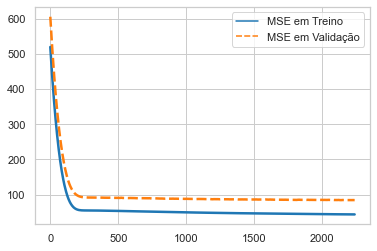

In [82]:
#plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth = 2.5)

In [83]:
#previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [84]:
previsoes

array([20.97225 , 18.502481, 23.96646 , 21.386927, 20.642946, 20.740519,
       24.576277, 21.978453, 21.130804, 20.93566 , 25.923979, 23.4908  ,
       21.34424 , 22.78951 , 23.320051, 21.685736, 27.088732, 23.417624,
       29.582891, 20.039225, 20.508787, 21.075918, 19.307444, 20.97225 ,
       19.075712, 23.576178, 22.935865, 14.398401, 17.313334, 35.431053,
       21.563772, 18.337831, 20.08801 , 22.868788, 31.71116 , 24.38114 ,
       21.880877, 28.131525, 25.82641 , 32.381966, 27.698553, 30.765944,
       32.247803, 17.313334, 23.131006, 23.344446, 18.46589 , 23.618864,
       37.437363, 35.571312, 18.26465 , 34.9554  , 31.259893, 25.98496 ,
       23.710337, 22.868788, 26.198397, 27.948576, 24.789717, 24.40553 ,
       23.240774, 19.167185, 23.478605, 22.874884, 21.17349 , 20.307547,
       21.30765 , 22.240671, 21.722326, 21.630854, 27.143614, 24.90558 ,
       10.995611, 14.117884, 17.22796 , 23.417624, 17.612146, 18.087805,
       23.45421 , 21.575972, 20.313643, 26.02765 , 